<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/DL_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/adult.csv')

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import recall_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
features_numeric =['Age', 'Education Num', 'Capital Gain', 'Capital Loss', 'Hours/Week', 'fnlgwt']
features_categorical = ['Workclass', 'Education', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
X = data[features_categorical]
y = data['Above/Below 50k']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert categorical features to numerical using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Get missing columns in test set compared to train set
missing_cols = set(X_train.columns) - set(X_test.columns)

# Add missing columns to test set with default value of 0
for col in missing_cols:
    X_test[col] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

# Now you can scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
model = keras.Sequential([
     layers.Input(shape=(X_train.shape[1],)),
     layers.Dense(128, activation='relu'),
     layers.Dense(64, activation='relu'),
     layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Convert y_train to numerical values if it contains strings
if y_train.dtype == object:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)

model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8036 - loss: 0.4120
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8349 - loss: 0.3518
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8333 - loss: 0.3549
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8367 - loss: 0.3509
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8403 - loss: 0.3395
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8400 - loss: 0.3423
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8391 - loss: 0.3397
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8425 - loss: 0.3342
Epoch 9/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8446 - loss: 0.3292
Epoch 10/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.3259


In [ ]:
# Convert y_test to numerical values if it contains strings
if y_test.dtype == object:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y_test = le.fit_transform(y_test)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8329 - loss: 0.3826
Test accuracy: 0.827882707118988


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")
print(f"F1 score: {f1:.4f}")

Recall: 0.5411
F1 score: 0.6026


In [ ]:
!pip install imbalanced-learn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset (replace 'your_dataset.csv' with the actual file)
data1 = pd.read_csv('/content/adult.csv')

# Separate features and target variable
X = data1.drop('Above/Below 50k', axis=1)
y = data1['Above/Below 50k']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert categorical features to numerical using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Get missing columns in test set compared to train set
missing_cols = set(X_train.columns) - set(X_test.columns)

# Add missing columns to test set with default value of 0
for col in missing_cols:
    X_test[col] = 0

# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

# Now you can scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Encode target variable
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Apply SMOTE for oversampling
'''smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)'''

rus = RandomUnderSampler()
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)

# Define the deep learning model with improvements
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer='l2'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Add early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
model.fit(X_train_balanced, y_train_balanced, epochs=50, batch_size=64, # Use the balanced dataset generated by RandomUnderSampler
          validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Accuracy: {accuracy:.4f}')

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7379 - loss: 1.3158 - precision_2: 0.6739 - recall_2: 0.5912 - val_accuracy: 0.7540 - val_loss: 0.7706 - val_precision_2: 1.0000 - val_recall_2: 0.7540
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8067 - loss: 0.5861 - precision_2: 0.7423 - recall_2: 0.7652 - val_accuracy: 0.7644 - val_loss: 0.6060 - val_precision_2: 1.0000 - val_recall_2: 0.7644
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8184 - loss: 0.4585 - precision_2: 0.7469 - recall_2: 0.7676 - val_accuracy: 0.7911 - val_loss: 0.5325 - val_precision_2: 1.0000 - val_recall_2: 0.7911
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8203 - loss: 0.4269 - precision_2: 0.7586 - recall_2: 0.7730 - val_accuracy: 0.7648 - val_loss: 0.5588 - val_precision_2: 1.0000 - val_recall_2: 0.7648
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8140 - loss: 0.4213 - precision_2: 0.7418 - recall_2: 0.7558 -

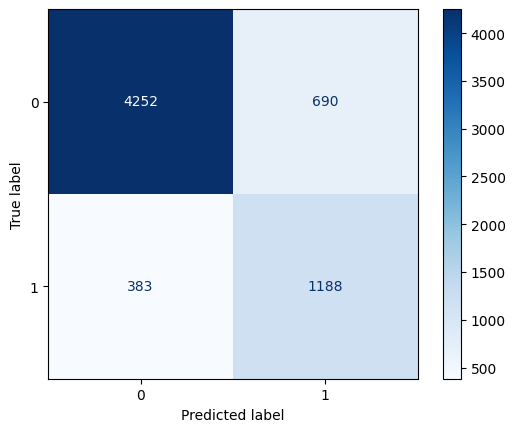

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues) # Use y_test and y_pred
plt.show()